$
    w = \frac{\overline{X} * \overline{Y} - \overline{(XY)}}{\overline{X}^2  - \overline{X^2}}
$

$
    b = \overline{Y} - w\overline{X}
$


线性回归函数参数: 斜率: 4.999999999999999 ,截距: 60.000000000000014


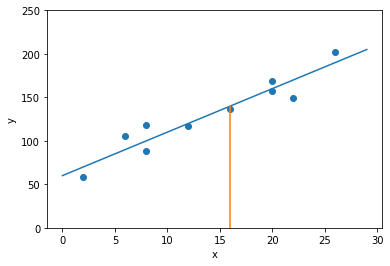

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

train_x = np.array([2, 6, 8, 8, 12, 16, 20, 20, 22, 26])
train_y = np.array([58, 105, 88, 118, 117, 137, 157, 169, 149, 202])


class OneLineaRegression:
    def __init__(self, train_x, train_y):
        self.train_x = train_x
        self.train_y = train_y
        self.train = np.hstack(
            (train_x.reshape(-1, 1), train_y.reshape(-1, 1)))
        self.w = 0
        self.b = 0

    def calcuate_loss(self):
        # x 均值
        x_avg = np.mean(self.train_x)
        # y 均值
        y_avg = np.mean(self.train_y)
        # x*y的均值
        xy_avg = np.mean(self.train_x * self.train_y)
        # 平方的均值
        xx_avg = np.mean(self.train_x ** 2)
        # 均值的平方
        x_avg_x = x_avg * x_avg

        self.w = (x_avg * y_avg - xy_avg) / (x_avg_x - xx_avg)
        self.b = y_avg - self.w * x_avg
        pass

    def predict(self, x):
        return self.w * x + self.b

    def show_line(self, pre_value):
        line_x = np.arange(0, 30)
        line_y = self.w * line_x + self.b
        plt.scatter(self.train_x, self.train_y)
        plt.plot(line_x, line_y)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(0, 250)
        plt.plot([pre_value, pre_value], [0, self.predict(pre_value)])
        plt.show()
        pass


liner = OneLineaRegression(train_x, train_y)
liner.calcuate_loss()
print('线性回归函数参数:', '斜率:', liner.w, ',截距:', liner.b)
# 显示一个预测点  (16,16*w+b)
liner.show_line(16)


线性回归函数参数: 斜率: 5.0 ,截距: 60.0


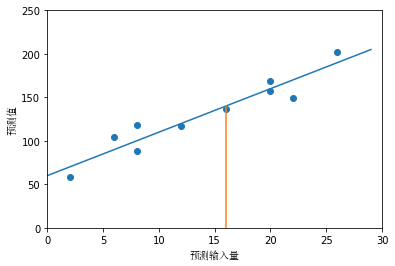

In [13]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train_x = np.array([2, 6, 8, 8, 12, 16, 20, 20, 22, 26]).reshape((-1, 1))
train_y = np.array([58, 105, 88, 118, 117, 137, 157,
                   169, 149, 202]).reshape((-1, 1))
model = LinearRegression()
model.fit(train_x, train_y)


def show_line(w, b, pre_x):
    line_x = np.arange(0, 30)
    line_y = w * line_x + b
    pre_value = w * pre_x + b
    plt.plot(line_x, line_y)
    plt.scatter(train_x, train_y)
    plt.xlabel('预测输入量',fontproperties="SimSun")
    plt.ylabel('预测值',fontproperties="SimSun")
    plt.ylim(0, 250)
    plt.xlim(0, 30)
    plt.plot([pre_x, pre_x], [0, pre_value])
    plt.show()


print('线性回归函数参数:', '斜率:', model.coef_[0, 0], ',截距:', model.intercept_[0])
show_line(model.coef_[0, 0], model.intercept_[0], 16)
